# TensorFlow and Keras

In [1]:
#Uncomment and use it
!pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
%matplotlib inline  

## Tensors

#### Constants

tf.constant creates constant values, these values do not change
or update during optimization process(training phase)

In [2]:
a = tf.constant([50,10])
print(a)

tf.Tensor([50 10], shape=(2,), dtype=int32)


Few things that we can do with the tensors at the runtime:
1. Directly get a numpy value of the tensor
2. dtype : data type of the tensor(int16/int32/float32/float64)
3. shape: shape of the tensor

In [34]:
print('a in tensorflow ==>', a)
print('numpy value of a ==>', a.numpy())
print('dtype of a ==>', a.dtype)
print('shape of a ==>', a.shape)

a in tensorflow ==> tf.Tensor([50 10], shape=(2,), dtype=int32)
numpy value of a ==> [50 10]
dtype of a ==> <dtype: 'int32'>
shape of a ==> (2,)


We can use inbuild tf.XX() function to create constant tensors, just like numpy.

In [35]:
print('Tensor of Ones: \n',tf.ones(shape=(2, 2)))
print('Tensor of Zeros: \n',tf.zeros(shape=(2, 2)))
print('Random normal values \n', tf.random.normal(shape=(3, 2),
                                                  mean=5, 
                                                  stddev=1))

Tensor of Ones: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Tensor of Zeros: 
 tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
Random normal values 
 tf.Tensor(
[[3.9231863 6.1468487]
 [8.150303  5.929065 ]
 [5.8310137 3.8419223]], shape=(3, 2), dtype=float32)


### Variables

We generally create a variable with some values, call it initialized values, 
convert this constant tensor into a variable and then mutate the variable by using special functions.

In [36]:
x = tf.Variable(5) # Simple variable
print(x)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>


In [37]:
#randomly initialized variable, like we need for our weights
w = tf.Variable(tf.random.normal(shape=(2, 2))) 
print(w)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.01143519, -1.5703366 ],
       [-1.0764749 , -1.5688355 ]], dtype=float32)>


In [38]:
m = tf.Variable(5) # Simple variable
print(m)

m = tf.Variable(5) 
print('New value', m.assign(2))

m = tf.Variable(5) 
print('increment by 1', m.assign_add(1))

m = tf.Variable(5) 
print('Decrement by 2', m.assign_sub(2))


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>
New value <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=2>
increment by 1 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>
Decrement by 2 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>


### Regression Model building in TensorFlow

#This step is for data creation, x and y

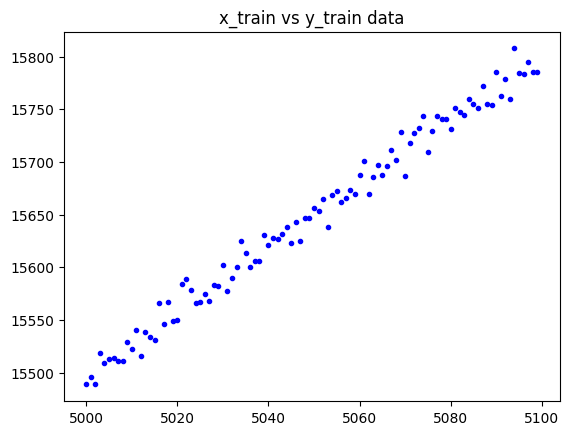

In [40]:
#This step is for data creation, x and y
import numpy as np
x_train= np.array(range(5000,5100)).reshape(-1,1)


y_train=[3*i+np.random.normal(500, 10) for i in x_train]

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.')
plt.show()

In [51]:
#Model y=X*W + b
#Model function
def output(x):
    return W*x + b

#Loss function Reduce mean square
def loss_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.normal(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  304549984.0,  W : [[-0.18097793]], b  [1.0000349]
epoch : 1, loss  274280000.0,  W : [[-0.01372164]], b  [1.0000681]
epoch : 2, loss  247018656.0,  W : [[0.14500514]], b  [1.0000995]
epoch : 3, loss  222466864.0,  W : [[0.2956374]], b  [1.0001293]
epoch : 4, loss  200355328.0,  W : [[0.4385879]], b  [1.0001576]
epoch : 5, loss  180441536.0,  W : [[0.57424843]], b  [1.0001844]
epoch : 6, loss  162507024.0,  W : [[0.7029908]], b  [1.0002099]
epoch : 7, loss  146355056.0,  W : [[0.82516766]], b  [1.0002341]
epoch : 8, loss  131808480.0,  W : [[0.94111395]], b  [1.0002571]
epoch : 9, loss  118707712.0,  W : [[1.0511473]], b  [1.000279]
epoch : 10, loss  106909072.0,  W : [[1.1555694]], b  [1.0002996]
epoch : 11, loss  96283136.0,  W : [[1.2546663]], b  [1.0003192]
epoch : 12, loss  86713320.0,  W : [[1.3487097]], b  [1.0003378]
epoch : 13, loss  78094688.0,  W : [[1.4379572]], b  [1.0003555]
epoch : 14, loss  70332672.0,  W : [[1.5226533]], b  [1.0003723]
epoch : 15, loss 

Final Weights

In [45]:
print('w ', W)
print('b ', b)

w  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[nan]], dtype=float32)>
b  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>


Plotting

epoch is: 0, loss is 474050272.0,  W is: [[-0.9931169]], b is [1.0000435]


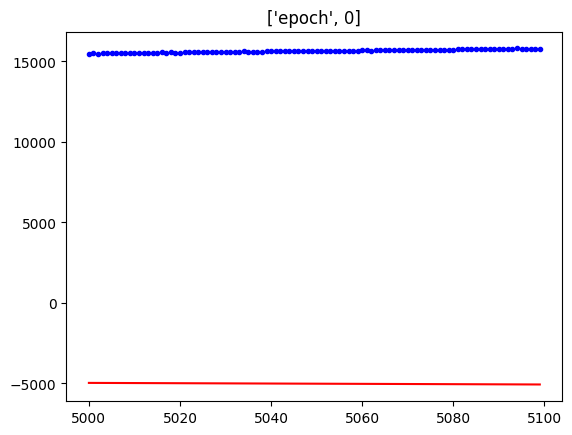

epoch is: 30, loss is 20506616.0,  W is: [[2.247722]], b is [1.0006852]


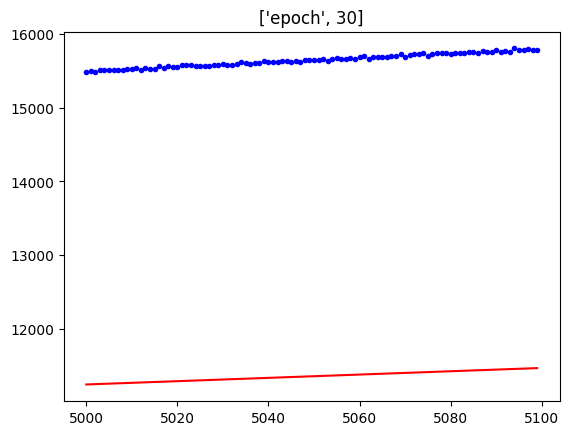

epoch is: 60, loss is 887189.125,  W is: [[2.9217703]], b is [1.0008188]


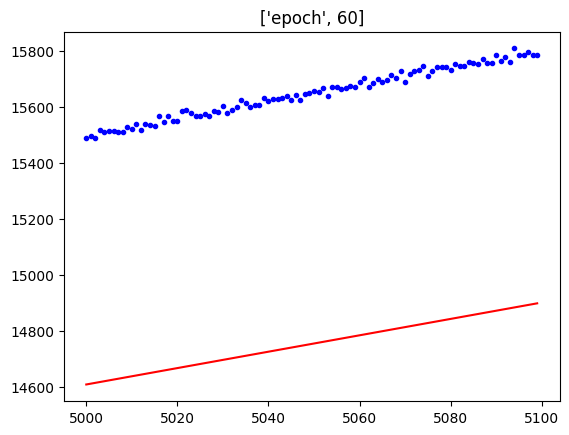

epoch is: 90, loss is 38490.73828125,  W is: [[3.0619628]], b is [1.0008465]


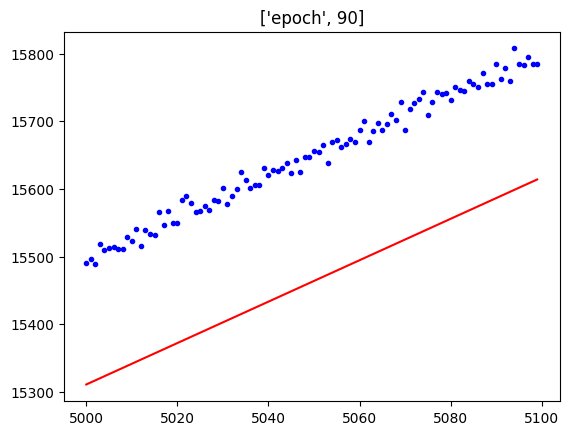

epoch is: 120, loss is 1777.84033203125,  W is: [[3.091121]], b is [1.0008523]


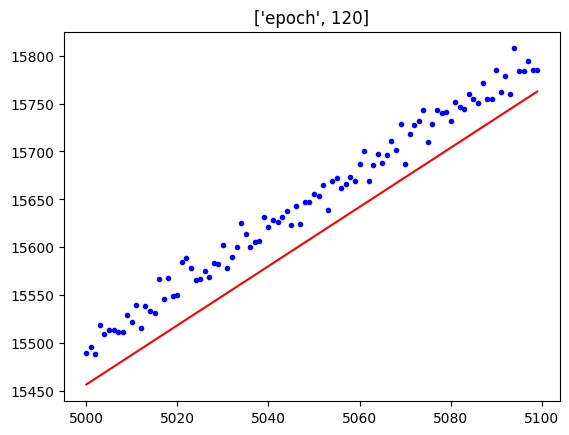

epoch is: 150, loss is 189.78077697753906,  W is: [[3.0971854]], b is [1.000853]


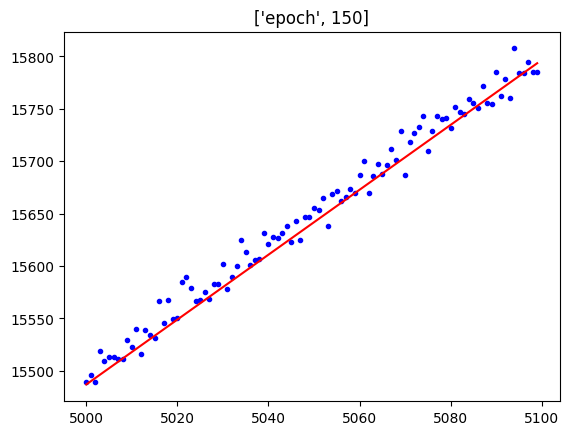

epoch is: 180, loss is 121.10013580322266,  W is: [[3.0984466]], b is [1.000853]


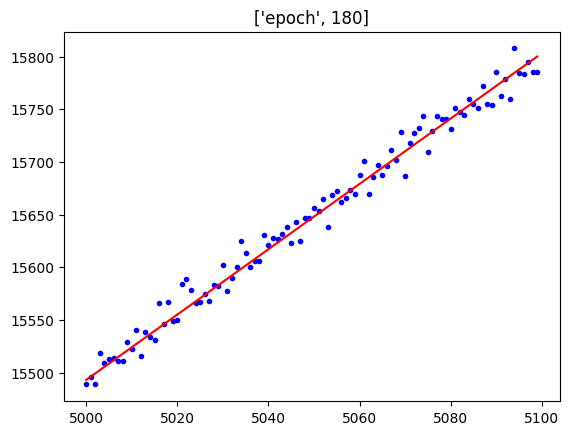

In [50]:
#Initialize Weights
W = tf.Variable(tf.random.normal(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    if i%30 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b.')
        plt.plot(x_train, output(x_train), c='r')
        plt.show()

### Logistic Regression Model building in TensorFlow

In [ ]:
# This step is for data creation
x_train= np.random.rand(100,1)
y_train=np.array([0 if i < 0.5 else 1 for i in x_train]).reshape(-1,1)

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.',)
plt.show()

In [ ]:
#Model y=sigmoid(X*W + b)
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

Plotting

In [ ]:
#Model y=X*W + b
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)

    if i%40 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b+')
        plt.plot(x_train, output(x_train), '.', c='r')
        plt.show()

# Keras

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [3]:
## The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


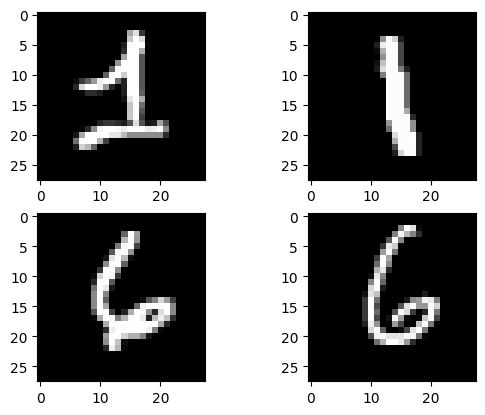

In [4]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[24], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[59000], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[32], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [5]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
model.add(layers.Dense(100, activation='sigmoid')) #, input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
model.add(layers.Dense(50, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='sigmoid'))

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4968 - accuracy: 0.8736
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1976 - accuracy: 0.9406
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1437 - accuracy: 0.9572
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1134 - accuracy: 0.9656
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0940 - accuracy: 0.9718
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0795 - accuracy: 0.9767
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0687 - accuracy: 0.9787
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0605 - accuracy: 0.9822
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0533 - accuracy: 0.9838
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.047

In [ ]:
print(model.get_weights())

In [15]:
#We will use 1 node in hidden
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
model.add(layers.Dense(1, activation='sigmoid')) #, input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
#model.add(layers.Dense(100, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='sigmoid'))

#Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 785       
                                                                 
 dense_9 (Dense)             (None, 10)                20        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0787 - accuracy: 0.1968
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8810 - accuracy: 0.2210
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8021 - accuracy: 0.2306
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7671 - accuracy: 0.2587
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7478 - accuracy: 0.2762
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7330 - accuracy: 0.2937
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7169 - accuracy: 0.3067
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6987 - accuracy: 0.3263
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6794 - accuracy: 0.3396
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.661

In [17]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\gowtham.balachan\AppData\Local\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\gowtham.balachan\AppData\Local\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gowtham.balachan\AppData\Local\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\gowtham.balachan\AppData\Local\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\gowtham.balachan\AppData\Local\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\gowtham.balachan\AppData\Local\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\gowtham.balachan\AppData\Local\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\gowtham.balachan\AppData\Local\anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\gowtham.balachan\AppData\Local\anaconda3\lib\site-packages\keras\losses.py", line 2078, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "C:\Users\gowtham.balachan\AppData\Local\anaconda3\lib\site-packages\keras\backend.py", line 5660, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(320,) and logits.shape=(32, 10)


In [ ]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

In [ ]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

# Normalize the images to the range [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten the images to 1D vectors of size 784
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Build the ANN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for MNIST
])

# Compile the model with Sparse Categorical Cross-Entropy loss
model.compile(loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_test, Y_test))


Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2731 - accuracy: 0.9208 - val_loss: 0.1365 - val_accuracy: 0.9577
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1168 - accuracy: 0.9647 - val_loss: 0.1113 - val_accuracy: 0.9653
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0813 - accuracy: 0.9755 - val_loss: 0.0955 - val_accuracy: 0.9727
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0644 - accuracy: 0.9804 - val_loss: 0.0993 - val_accuracy: 0.9687
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0513 - accuracy: 0.9845 - val_loss: 0.0798 - val_accuracy: 0.9768


In [23]:
loss, acc = model.evaluate(X_test,  Y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.0853 - accuracy: 0.9754 - 889ms/epoch - 3ms/step
Test Accuracy: 97.54%


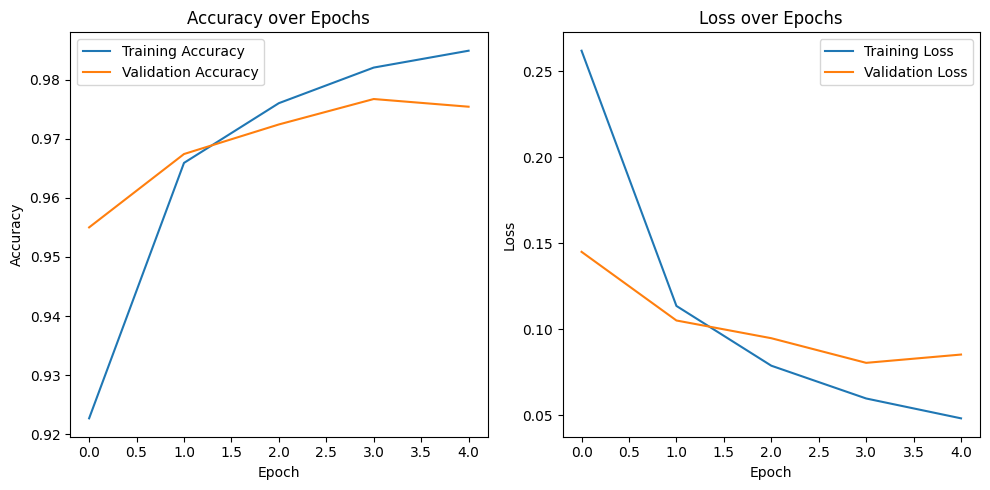

In [24]:
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by model.fit()
if hasattr(history, 'history'):
    history_dict = history.history
    if 'accuracy' in history_dict and 'val_accuracy' in history_dict:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history_dict['accuracy'], label='Training Accuracy')
        plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    if 'loss' in history_dict and 'val_loss' in history_dict:
        plt.subplot(1, 2, 2)
        plt.plot(history_dict['loss'], label='Training Loss')
        plt.plot(history_dict['val_loss'], label='Validation Loss')
        plt.title('Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("The 'history' object does not seem to have a 'history' attribute.")

In [10]:
y_test.shape

(10000, 10)

In [27]:
from scipy.special import gamma

# Calculate gamma(5) which is equal to (5-1)! = 4! = 24
result = gamma(5)
print(result)
# Expected Output: 24.0

# Calculate gamma(0.5) which is equal to sqrt(pi)
result = gamma(0.5)
print(result)
# Expected Output: 1.7724538509055159

24.0
1.7724538509055159


In [4]:
import numpy as np

In [10]:
x1 = np.array([0,0,1,1])
x2 = np.array([0,1,1,0])
y = np.array([0,1,1,1])

def or_gate(x1,x2,w1,w2):
    return (x1*w1)+(x2*w2)

In [15]:
# Initialize weights
weights = np.random.randn(2)
w1 = weights[0]
w2 = weights[1]

# Hyperparameters
eta = 0.01
iterations = 1000

error = []
best_loss = float('inf')
best_w1 = 0
best_w2 = 0

for i in range(iterations):
    # Linear prediction
    y_pred = w1 * x1 + w2 * x2
    
    # Loss (Mean Squared Error)
    diff = y_pred - y
    loss = np.sum(diff ** 2)
    error.append(loss)

    # Store best weights
    if loss < best_loss:
        best_loss = loss
        best_w1 = w1
        best_w2 = w2

    # Compute gradients
    dw1 = np.sum(2 * diff * x1)
    dw2 = np.sum(2 * diff * x2)

    # Weight updates
    w1 = w1 - eta * dw1
    w2 = w2 - eta * dw2

print("Best weights: w1 =", best_w1, ", w2 =", best_w2)
print("Best loss:", best_loss)

Best weights: w1 = 0.6666666683548553 , w2 = 0.6666666649784779
Best loss: 0.3333333333333333


In [17]:
or_gate(x1,x2,w1,w2)

array([0.        , 0.66666667, 1.33333333, 0.66666667])

In [28]:
# Initialize weights
x1 = np.array([0,0,1,1])
x2 = np.array([0,1,1,0])
x3 = x1&x2
y = np.array([0,1,1,1])

def or_gate(x1,x2,w1,w2,w3):
    return (x1*w1)+(x2*w2)+(x3*w3)
weights = np.random.randn(3)
w1 = weights[0]
w2 = weights[1]
w3 = weights[2]

# Hyperparameters
eta = 0.01
iterations = 1000

error = []
best_loss = float('inf')
best_w1 = 0
best_w2 = 0
best_w3 = 0
for i in range(iterations):
    # Linear prediction
    y_pred = w1 * x1 + w2 * x2 + w3 * x3
    
    # Loss (Mean Squared Error)
    diff = y_pred - y
    loss = np.sum(diff ** 2)
    error.append(loss)

    # Store best weights
    if loss < best_loss:
        best_loss = loss
        best_w1 = w1
        best_w2 = w2
        best_w3 = w3

    # Compute gradients
    dw1 = np.sum(2 * diff * x1)
    dw2 = np.sum(2 * diff * x2)
    dw3 = np.sum(2 * diff * x3)
    # Weight updates
    w1 = w1 - eta * dw1
    w2 = w2 - eta * dw2
    w3 = w3 - eta * dw3

print("Best weights: w1 =", best_w1, ", w2 =", best_w2,"w3=",best_w3)
print("Best loss:", best_loss)

Best weights: w1 = 0.9967127971170376 , w2 = 0.9967127958513418 w3= -0.9910191929799875
Best loss: 2.7402174812844392e-05


In [29]:
or_gate(x1,x2,w1,w2,w3)

array([0.        , 0.99673041, 1.0023935 , 0.99673041])

In [27]:
x3

array([0, 0, 1, 0])

# Lets do polynomial feature 

In [30]:
# Initialize weights
x1 = np.array([0,0,1,1])
x2 = np.array([0,1,1,0])
x3 = x1&x2
y = np.array([0,1,1,1])

def or_gate(x1,x2,w1,w2,w3):
    return (x1*w1)+(x2*w2)+(x3*w3)
weights = np.random.randn(3)
w1 = weights[0]
w2 = weights[1]
w3 = weights[2]

# Hyperparameters
eta = 0.01
iterations = 1000

error = []
best_loss = float('inf')
best_w1 = 0
best_w2 = 0
best_w3 = 0
for i in range(iterations):
    # Linear prediction
    y_pred = w1 * x1 + w2 * x2 + w3 * x3
    
    # Loss (Mean Squared Error)
    diff = y_pred - y
    loss = np.sum(diff ** 2)
    error.append(loss)

    # Store best weights
    if loss < best_loss:
        best_loss = loss
        best_w1 = w1
        best_w2 = w2
        best_w3 = w3

    # Compute gradients
    dw1 = np.sum(2 * diff * x1)
    dw2 = np.sum(2 * diff * x2)
    dw3 = np.sum(2 * diff * x3)
    # Weight updates
    w1 = w1 - eta * dw1
    w2 = w2 - eta * dw2
    w3 = w3 - eta * dw3

print("Best weights: w1 =", best_w1, ", w2 =", best_w2,"w3=",best_w3)
print("Best loss:", best_loss)

Best weights: w1 = 0.9992982453080909 , w2 = 0.9992982396503557 w3= -0.9980827627986442
Best loss: 1.2488376934214252e-06


In [31]:
x4 = x1 or x1
x5 = x2 or x2


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [32]:
a = tf.constant((50,10))
print(a)

tf.Tensor([50 10], shape=(2,), dtype=int32)


In [1]:
from tensorflow.keras.datasets import cifar10

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Shape info
print("Train images:", x_train.shape)  # (50000, 32, 32, 3)
print("Train labels:", y_train.shape)  # (50000, 1)
print("Test images:", x_test.shape)    # (10000, 32, 32, 3)

Train images: (50000, 32, 32, 3)
Train labels: (50000, 1)
Test images: (10000, 32, 32, 3)


In [2]:
import numpy as np
no_of_classes = np.unique(y_train)

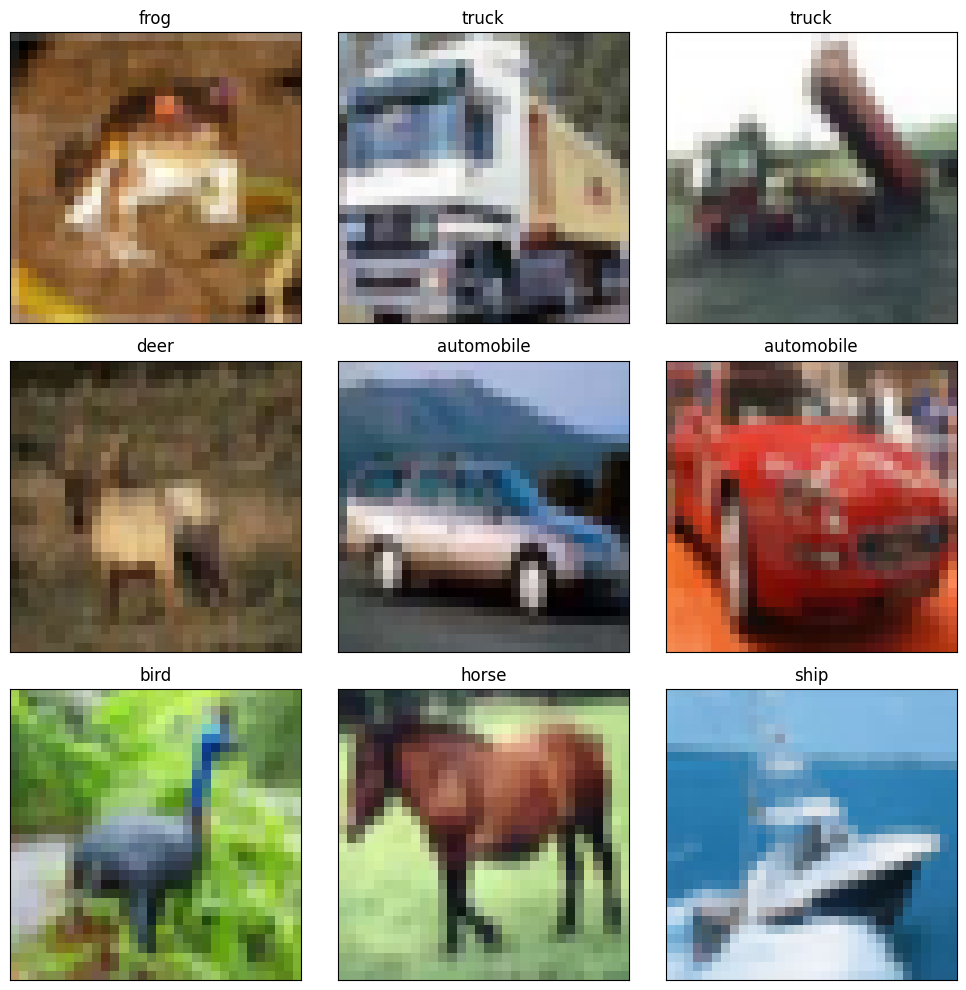

In [3]:
import matplotlib.pyplot as plt
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])  # remove x-ticks
    plt.yticks([])  # remove y-ticks
    plt.grid(False) # remove grid
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()

In [4]:
# Normalize the images to the range [0, 1]
X_train = x_train.astype("float32") / 255.0
X_test = x_test.astype("float32") / 255.0

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
# Flatten the training and test data
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # shape: (50000, 3072)
x_test_flat = x_test.reshape(x_test.shape[0], -1)  

In [13]:
model = keras.Sequential()
model.add(layers.Input(shape=(3072,)))
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
model.add(layers.Dense(5000, activation='sigmoid')) #, input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
model.add(layers.Dense(1000, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='softmax'))

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              15365000  
                                                                 
 dense_1 (Dense)             (None, 1000)              5001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 20,376,010
Trainable params: 20,376,010
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train_flat, y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 379s 240ms/step - loss: 2.3946 - accuracy: 0.1026
Epoch 2/10
1563/1563 [==============================] - 368s 235ms/step - loss: 2.3411 - accuracy: 0.1141
Epoch 3/10
1563/1563 [==============================] - 358s 229ms/step - loss: 2.2971 - accuracy: 0.1338
Epoch 4/10
1563/1563 [==============================] - 343s 220ms/step - loss: 2.2740 - accuracy: 0.1385
Epoch 5/10
1563/1563 [==============================] - 350s 224ms/step - loss: 2.2841 - accuracy: 0.1361
Epoch 6/10
1563/1563 [==============================] - 354s 226ms/step - loss: 2.2656 - accuracy: 0.1422
Epoch 7/10
1563/1563 [==============================] - 327s 209ms/step - loss: 2.2526 - accuracy: 0.1450
Epoch 8/10
1563/1563 [==============================] - 335s 214ms/step - loss: 2.2516 - accuracy: 0.1449
Epoch 9/10
1563/1563 [==============================] - 332s 213ms/step - loss: 2.2394 - accuracy: 0.1498
Epoch 10/10
1563/1563 [=======================

## Lets try to introduce complexity to the model

In [19]:
# Flatten y_train to 1D
y_train_cat = y_train.flatten()

# Compute frequency of each class (0 to 9)
unique_classes, class_counts = np.unique(y_train_cat, return_counts=True)

# Display frequencies
for label, count in zip(unique_classes, class_counts):
    print(f"Class {label}: {count} samples")

Class 0: 5000 samples
Class 1: 5000 samples
Class 2: 5000 samples
Class 3: 5000 samples
Class 4: 5000 samples
Class 5: 5000 samples
Class 6: 5000 samples
Class 7: 5000 samples
Class 8: 5000 samples
Class 9: 5000 samples


In [20]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten the input data
x_train_flat = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0

# Build the improved model
model = keras.Sequential()
model.add(layers.Input(shape=(3072,)))

# First dense block
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

# Second dense block
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.5))

# Third dense block
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.3))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Show model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4096)              12587008  
                                                                 
 dropout_3 (Dropout)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 2048)              8390656   
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 10)               

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation monitoring
history = model.fit(x_train_flat, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test_flat, y_test))

Epoch 1/10
391/391 [==============================] - 146s 371ms/step - loss: 2.1897 - accuracy: 0.2188 - val_loss: 1.9562 - val_accuracy: 0.3048
Epoch 2/10
391/391 [==============================] - 156s 399ms/step - loss: 1.9612 - accuracy: 0.2699 - val_loss: 1.8946 - val_accuracy: 0.3377
Epoch 3/10
391/391 [==============================] - 153s 391ms/step - loss: 1.9377 - accuracy: 0.2784 - val_loss: 1.8760 - val_accuracy: 0.3394
Epoch 4/10
391/391 [==============================] - 146s 372ms/step - loss: 1.9161 - accuracy: 0.2876 - val_loss: 1.8944 - val_accuracy: 0.3506
Epoch 5/10
391/391 [==============================] - 148s 378ms/step - loss: 1.9034 - accuracy: 0.2937 - val_loss: 1.8843 - val_accuracy: 0.3400
Epoch 6/10
391/391 [==============================] - 151s 386ms/step - loss: 1.8836 - accuracy: 0.3057 - val_loss: 1.8642 - val_accuracy: 0.3586
Epoch 7/10
391/391 [==============================] - 150s 383ms/step - loss: 1.8676 - accuracy: 0.3121 - val_loss: 1.8634 -

# # We will try not using dropout

In [22]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10


# Build the improved model
model = keras.Sequential()
model.add(layers.Input(shape=(3072,)))

# First dense block
model.add(layers.Dense(4096, activation='relu'))


# Second dense block
model.add(layers.Dense(2048, activation='relu'))


# Third dense block
model.add(layers.Dense(1024, activation='relu'))


# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Show model architecture
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4096)              12587008  
                                                                 
 dense_12 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_13 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_14 (Dense)            (None, 10)                10250     
                                                                 
Total params: 23,086,090
Trainable params: 23,086,090
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation monitoring
history = model.fit(x_train_flat, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test_flat, y_test))

Epoch 1/10
391/391 [==============================] - 136s 346ms/step - loss: 2.0085 - accuracy: 0.3006 - val_loss: 1.7249 - val_accuracy: 0.3726
Epoch 2/10
391/391 [==============================] - 133s 340ms/step - loss: 1.6920 - accuracy: 0.3898 - val_loss: 1.6333 - val_accuracy: 0.4134
Epoch 3/10
391/391 [==============================] - 134s 342ms/step - loss: 1.5798 - accuracy: 0.4343 - val_loss: 1.5387 - val_accuracy: 0.4506
Epoch 4/10
391/391 [==============================] - 132s 339ms/step - loss: 1.5166 - accuracy: 0.4570 - val_loss: 1.4950 - val_accuracy: 0.4660
Epoch 5/10
391/391 [==============================] - 133s 341ms/step - loss: 1.4641 - accuracy: 0.4760 - val_loss: 1.4771 - val_accuracy: 0.4802
Epoch 6/10
391/391 [==============================] - 133s 339ms/step - loss: 1.4199 - accuracy: 0.4889 - val_loss: 1.4624 - val_accuracy: 0.4771
Epoch 7/10
391/391 [==============================] - 134s 343ms/step - loss: 1.3771 - accuracy: 0.5055 - val_loss: 1.4292 -

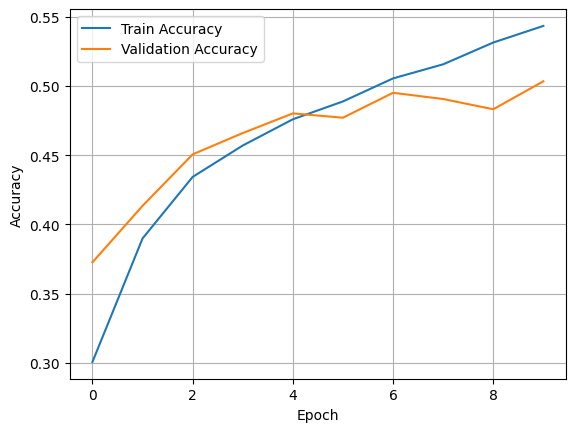

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10


# Build the improved model
model = keras.Sequential()
model.add(layers.Input(shape=(3072,)))

# First dense block
model.add(layers.Dense(4096, activation='relu'))


# Second dense block
model.add(layers.Dense(2048, activation='relu'))


# Third dense block
model.add(layers.Dense(1024, activation='relu'))


# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Show model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              12587008  
                                                                 
 dense_1 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 23,086,090
Trainable params: 23,086,090
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation monitoring
history = model.fit(x_train_flat, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_test_flat, y_test))

Epoch 1/30
391/391 [==============================] - 151s 385ms/step - loss: 95.8543 - accuracy: 0.2736 - val_loss: 1.8030 - val_accuracy: 0.3406
Epoch 2/30
391/391 [==============================] - 137s 350ms/step - loss: 1.7661 - accuracy: 0.3697 - val_loss: 1.6622 - val_accuracy: 0.4121
Epoch 3/30
391/391 [==============================] - 136s 348ms/step - loss: 1.6985 - accuracy: 0.3975 - val_loss: 1.6914 - val_accuracy: 0.3944
Epoch 4/30
391/391 [==============================] - 148s 378ms/step - loss: 1.6495 - accuracy: 0.4114 - val_loss: 1.6486 - val_accuracy: 0.4108
Epoch 5/30
391/391 [==============================] - 136s 349ms/step - loss: 1.6139 - accuracy: 0.4242 - val_loss: 1.6283 - val_accuracy: 0.4159
Epoch 6/30
391/391 [==============================] - 138s 352ms/step - loss: 1.6037 - accuracy: 0.4278 - val_loss: 1.6863 - val_accuracy: 0.4072
Epoch 7/30
391/391 [==============================] - 148s 378ms/step - loss: 1.5838 - accuracy: 0.4365 - val_loss: 1.5939 

## We will train more complex model with more epochs and dropout

In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10



# Build the improved model
model = keras.Sequential()
model.add(layers.Input(shape=(3072,)))

# First dense block
model.add(layers.Dense(5000, activation='relu'))
model.add(layers.Dropout(0.2))

# Second dense block
model.add(layers.Dense(2500, activation='relu'))
model.add(layers.Dropout(0.3))

# Third dense block
model.add(layers.Dense(1250, activation='relu'))
model.add(layers.Dropout(0.3))

# Third dense block
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))


# Third dense block
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Show model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              15365000  
                                                                 
 dropout (Dropout)           (None, 5000)              0         
                                                                 
 dense_1 (Dense)             (None, 2500)              12502500  
                                                                 
 dropout_1 (Dropout)         (None, 2500)              0         
                                                                 
 dense_2 (Dense)             (None, 1250)              3126250   
                                                                 
 dropout_2 (Dropout)         (None, 1250)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               6

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation monitoring
history = model.fit(x_train_flat, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test_flat, y_test))

Epoch 1/10
391/391 [==============================] - 180s 456ms/step - loss: 2.3669 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 187s 479ms/step - loss: 2.3098 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
295/391 [=====================>........] - ETA: 44s - loss: 2.3032 - accuracy: 0.0998

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## We will drop all dropouts which is actually making the model simple and we will run the model

In [12]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10



# Build the improved model
model = keras.Sequential()
model.add(layers.Input(shape=(3072,)))

# First dense block
model.add(layers.Dense(5000, activation='relu'))


# Second dense block
model.add(layers.Dense(2500, activation='relu'))


# Third dense block
model.add(layers.Dense(1250, activation='relu'))


# Third dense block
model.add(layers.Dense(512, activation='relu'))



# Third dense block
model.add(layers.Dense(256, activation='relu'))


# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Show model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 5000)              15365000  
                                                                 
 dense_11 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_12 (Dense)            (None, 1250)              3126250   
                                                                 
 dense_13 (Dense)            (None, 512)               640512    
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 31,768,160
Trainable params: 31,768,160


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation monitoring
history = model.fit(x_train_flat, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_test_flat, y_test))

Epoch 1/30
391/391 [==============================] - 184s 468ms/step - loss: 46.0339 - accuracy: 0.2808 - val_loss: 1.7526 - val_accuracy: 0.3686
Epoch 2/30
391/391 [==============================] - 180s 460ms/step - loss: 1.7088 - accuracy: 0.3856 - val_loss: 1.6448 - val_accuracy: 0.4140
Epoch 3/30
391/391 [==============================] - 181s 462ms/step - loss: 1.6483 - accuracy: 0.4112 - val_loss: 1.6327 - val_accuracy: 0.4140
Epoch 4/30
391/391 [==============================] - 187s 478ms/step - loss: 1.5868 - accuracy: 0.4297 - val_loss: 1.6109 - val_accuracy: 0.4273
Epoch 5/30
391/391 [==============================] - 169s 432ms/step - loss: 1.5720 - accuracy: 0.4359 - val_loss: 1.7517 - val_accuracy: 0.3809
Epoch 6/30
391/391 [==============================] - 167s 427ms/step - loss: 1.5401 - accuracy: 0.4461 - val_loss: 1.6094 - val_accuracy: 0.4264
Epoch 7/30
391/391 [==============================] - 166s 424ms/step - loss: 1.5103 - accuracy: 0.4605 - val_loss: 1.5494 

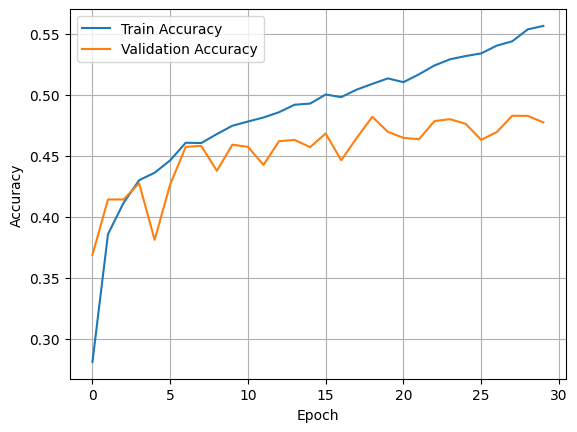

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
